In [24]:
### import numpy as np 
import pandas as pd
from pandas import DataFrame
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from collections import defaultdict
from matplotlib.colors import rgb2hex, colorConverter
from datetime import time
from sklearn.decomposition import PCA
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

mpl.rcParams['figure.dpi']= 300

In [25]:
##### Import data
outprefix = "VOCs_spike_first300_protein_features_set4"
df_complete = pd.read_csv('Figure1_data.csv', sep=",", index_col='Genome', na_values=['-'])
df_complete

,charge,aromaticity,instability,gravy,helix,turn,sheet,A,C,D,...,M,N,P,Q,R,S,T,V,W,Y
Genome,,,,,,,,,,,,,,,,,,,,,
hCoV-19/USA/ID-IVREF-697986/2020|EPI_ISL_8883178|2020-12-30|NorthAmerica|AY.103,-3.2844,0.1117,32.8072,-0.0899,0.3320,0.2581,0.1943,0.0622,0.0315,0.0480,...,0.011,0.0700,0.0448,0.0488,0.0346,0.0779,0.0747,0.0763,0.0094,0.0425
hCoV-19/USA/UT-UPHL-220109420824/2021|EPI_ISL_8620376|2021-01-01|NorthAmerica|AY.103,-3.2844,0.1117,32.8072,-0.0899,0.3320,0.2581,0.1943,0.0622,0.0315,0.0480,...,0.011,0.0700,0.0448,0.0488,0.0346,0.0779,0.0747,0.0763,0.0094,0.0425
hCoV-19/USA/ID-IBL-759328/2021|EPI_ISL_5441247|2021-01-02|NorthAmerica|AY.103,-3.2844,0.1117,32.8072,-0.0899,0.3320,0.2581,0.1943,0.0622,0.0315,0.0480,...,0.011,0.0700,0.0448,0.0488,0.0346,0.0779,0.0747,0.0763,0.0094,0.0425
hCoV-19/USA/TN-SPHL-0964/2021|EPI_ISL_5703445|2021-01-14|NorthAmerica|AY.103,-3.2844,0.1117,32.8072,-0.0899,0.3320,0.2581,0.1943,0.0622,0.0315,0.0480,...,0.011,0.0700,0.0448,0.0488,0.0346,0.0779,0.0747,0.0763,0.0094,0.0425
hCoV-19/Dominican_Republic/1424742/2021|EPI_ISL_9413615|2021-02-11|NorthAmerica|AY.103,-3.2844,0.1117,32.8072,-0.0899,0.3320,0.2581,0.1943,0.0622,0.0315,0.0480,...,0.011,0.0700,0.0448,0.0488,0.0346,0.0779,0.0747,0.0763,0.0094,0.0425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hCoV-19/Brazil/GO-1209/2021|EPI_ISL_985316|2021-01-19|SouthAmerica|P.1,-6.3264,0.1163,32.7075,-0.0661,0.3362,0.2584,0.1940,0.0621,0.0314,0.0471,...,0.011,0.0691,0.0448,0.0487,0.0322,0.0793,0.0754,0.0754,0.0094,0.0448
hCoV-19/Brazil/AM-FIOCRUZ-21840506ISF/2021|EPI_ISL_2777472|2021-01-19|SouthAmerica|P.1,-6.3264,0.1163,32.7075,-0.0661,0.3362,0.2584,0.1940,0.0621,0.0314,0.0471,...,0.011,0.0691,0.0448,0.0487,0.0322,0.0793,0.0754,0.0754,0.0094,0.0448
hCoV-19/Brazil/AM-1036/2021|EPI_ISL_906076|2021-01-19|SouthAmerica|P.1,-6.3264,0.1163,32.7075,-0.0661,0.3362,0.2584,0.1940,0.0621,0.0314,0.0471,...,0.011,0.0691,0.0448,0.0487,0.0322,0.0793,0.0754,0.0754,0.0094,0.0448


In [26]:
#remove columns with all zeros
df0 = df_complete.loc[:, (df_complete != 0).any(axis=0)]

In [27]:
#normalize to min/max of each column
df1= df0.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df1.to_csv(outprefix+'_df1_minmaxnorm.csv', sep=',')

In [28]:
#add column with lineage
def extract_lineage (row):
    id_pieces2= (row['genome_id']).split("|")    
    return  id_pieces2[-1]

#Make column with Genome from index
df1['genome_id'] = df1.index
                                     
#apply to all rows 
df1['Lineage'] = df1.apply (lambda row: extract_lineage (row),axis=1)
df1

,charge,aromaticity,instability,gravy,helix,turn,sheet,A,C,D,...,P,Q,R,S,T,V,W,Y,genome_id,Lineage
Genome,,,,,,,,,,,,,,,,,,,,,
hCoV-19/USA/ID-IVREF-697986/2020|EPI_ISL_8883178|2020-12-30|NorthAmerica|AY.103,0.570322,0.220588,0.242091,0.218919,0.108108,0.787037,0.508475,0.500000,0.529412,0.589744,...,0.46875,0.794872,0.826087,0.600000,0.390244,0.500000,0.5,0.390244,hCoV-19/USA/ID-IVREF-697986/2020|EPI_ISL_88831...,AY.103
hCoV-19/USA/UT-UPHL-220109420824/2021|EPI_ISL_8620376|2021-01-01|NorthAmerica|AY.103,0.570322,0.220588,0.242091,0.218919,0.108108,0.787037,0.508475,0.500000,0.529412,0.589744,...,0.46875,0.794872,0.826087,0.600000,0.390244,0.500000,0.5,0.390244,hCoV-19/USA/UT-UPHL-220109420824/2021|EPI_ISL_...,AY.103
hCoV-19/USA/ID-IBL-759328/2021|EPI_ISL_5441247|2021-01-02|NorthAmerica|AY.103,0.570322,0.220588,0.242091,0.218919,0.108108,0.787037,0.508475,0.500000,0.529412,0.589744,...,0.46875,0.794872,0.826087,0.600000,0.390244,0.500000,0.5,0.390244,hCoV-19/USA/ID-IBL-759328/2021|EPI_ISL_5441247...,AY.103
hCoV-19/USA/TN-SPHL-0964/2021|EPI_ISL_5703445|2021-01-14|NorthAmerica|AY.103,0.570322,0.220588,0.242091,0.218919,0.108108,0.787037,0.508475,0.500000,0.529412,0.589744,...,0.46875,0.794872,0.826087,0.600000,0.390244,0.500000,0.5,0.390244,hCoV-19/USA/TN-SPHL-0964/2021|EPI_ISL_5703445|...,AY.103
hCoV-19/Dominican_Republic/1424742/2021|EPI_ISL_9413615|2021-02-11|NorthAmerica|AY.103,0.570322,0.220588,0.242091,0.218919,0.108108,0.787037,0.508475,0.500000,0.529412,0.589744,...,0.46875,0.794872,0.826087,0.600000,0.390244,0.500000,0.5,0.390244,hCoV-19/Dominican_Republic/1424742/2021|EPI_IS...,AY.103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hCoV-19/Brazil/GO-1209/2021|EPI_ISL_985316|2021-01-19|SouthAmerica|P.1,0.353343,0.897059,0.206125,0.862162,0.675676,0.814815,0.457627,0.470588,0.470588,0.358974,...,0.46875,0.769231,0.304348,0.854545,0.560976,0.235294,0.5,0.951220,hCoV-19/Brazil/GO-1209/2021|EPI_ISL_985316|202...,P.1
hCoV-19/Brazil/AM-FIOCRUZ-21840506ISF/2021|EPI_ISL_2777472|2021-01-19|SouthAmerica|P.1,0.353343,0.897059,0.206125,0.862162,0.675676,0.814815,0.457627,0.470588,0.470588,0.358974,...,0.46875,0.769231,0.304348,0.854545,0.560976,0.235294,0.5,0.951220,hCoV-19/Brazil/AM-FIOCRUZ-21840506ISF/2021|EPI...,P.1
hCoV-19/Brazil/AM-1036/2021|EPI_ISL_906076|2021-01-19|SouthAmerica|P.1,0.353343,0.897059,0.206125,0.862162,0.675676,0.814815,0.457627,0.470588,0.470588,0.358974,...,0.46875,0.769231,0.304348,0.854545,0.560976,0.235294,0.5,0.951220,hCoV-19/Brazil/AM-1036/2021|EPI_ISL_906076|202...,P.1


In [29]:
#color dictionary should cover all lineages examined
lineage_color_dict={"B":"#007180",
"B.1":"#59b9c6","B.1.1":"#38b48b","B.1.1.7":"#5c9291","B.1.177":"#3b5e5e",
"B.1.351":"#53595f","B.1.525":"#777f88","B.1.526":"#adb2b8",
"P.1":"#dfbf9f",
"B.1.617.2":"#b00149","AY.4":"#fd4508","AY.103":"#ee7744","AY.43":"#fd8868",
"AY.44":"#fdb09b","AY.122":"#ff8080",
"BA.1":"#50bdfb","BA.1.1":"#5c85d6",               
"BA.2":"#0485d1","BA.2.9":"#036096","BA.2.12":"#79a6d2","BA.4":"#0073e6","BA.5":"#485690","BA.5.1":"#538cc6"}


In [30]:
y =df1['Lineage']
X= df1.drop((['genome_id','Lineage']), axis=1) 

In [31]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Optimal number of features : 26
Best features : ['charge', 'aromaticity', 'instability', 'gravy', 'helix', 'turn', 'sheet', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
['charge', 'aromaticity', 'instability', 'gravy', 'helix', 'turn', 'sheet', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
27
[0.0752628185272269, 0.033261191080887015, 0.060441500276162886, 0.06731916629029566, 0.04134011697099115, 0.047263174144901374, 0.029816920950316787, 0.03100867486385147, 0.009878859910044595, 0.05005156950420663, 0.019477563586195734, 0.01698488838613756, 0.056606702757387724, 0.01880951567633104, 0.03274293655769387, 0.04858539393290691, 0.03220023976754175, 0.0008863683697740426, 0.0373100598349635, 0.02963758599637427, 0.03567374682046635, 0.060557223728870374, 0.025156969969104524, 0.06112331672762275, 0.037696844730722975, 0.00448469539318935, 0.03642195524583295]
27


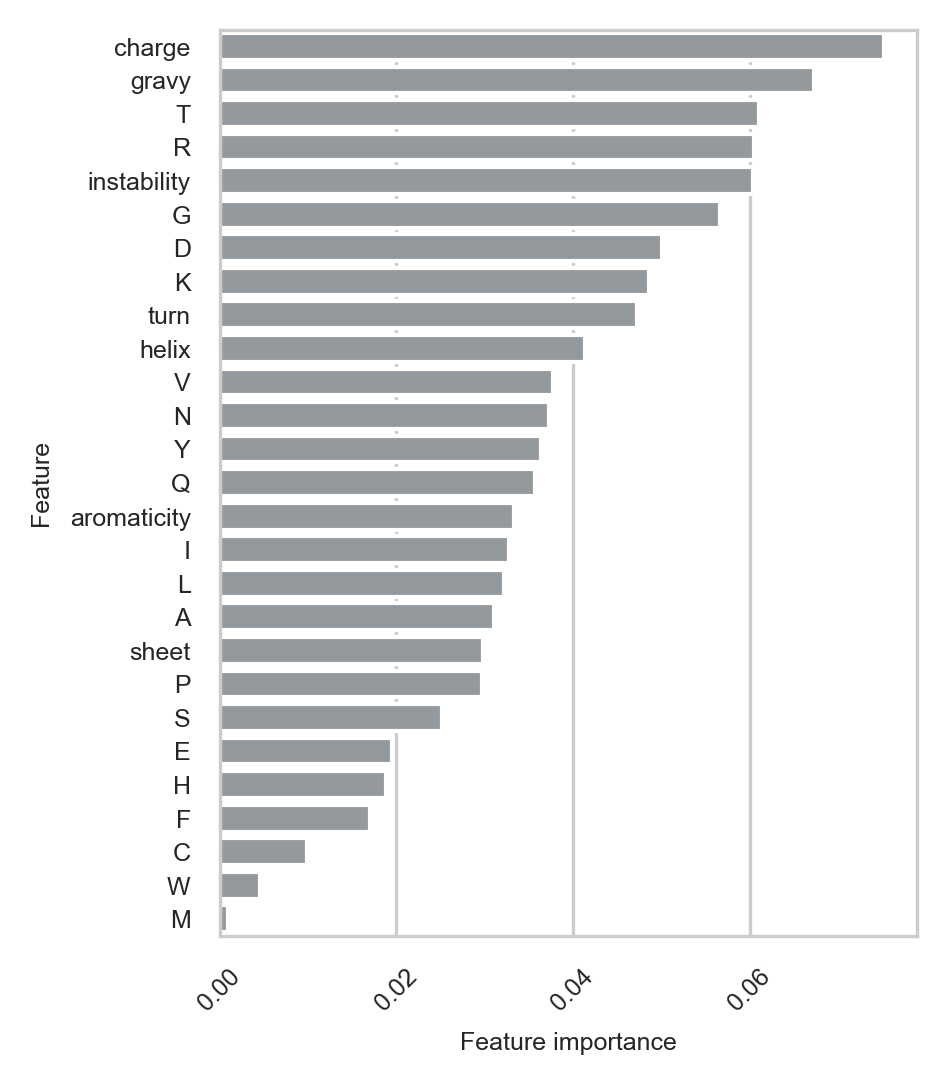

In [32]:
# determine importance, plot values in order

cv_estimator = RandomForestClassifier(random_state = 42)
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.3, random_state=42)
cv_estimator.fit(X_train, Y_train)
cv_selector = RFECV(cv_estimator, cv= 5, step=1, scoring='accuracy')
cv_selector = cv_selector.fit(X_train, Y_train)
rfecv_mask = cv_selector.get_support() #list of booleans
rfecv_features = []

for bool, feature in zip(rfecv_mask, X_train.columns):    
    if bool:
        rfecv_features.append(feature)

rfecv_features2 = []
rfecv_values =[]
for element in cv_estimator.feature_importances_:
    rfecv_values.append(element)
    
for feature in  X_train.columns:
    rfecv_features2.append(feature)
    

print('Optimal number of features :', cv_selector.n_features_)
print('Best features :', rfecv_features)
n_features = X_train.shape[1]


print(rfecv_features2)
print(str(len(rfecv_features2)))

print(rfecv_values)
print(str(len(rfecv_values)))

feature_importance_df = pd.DataFrame(list(zip(rfecv_features2, rfecv_values)), columns=['Feature','Importance'])

feature_importance_df

feature_importance_df['Importance'] = feature_importance_df['Importance'].astype(float)
#order by amplicon
feature_importance_df_ordered = feature_importance_df.sort_values(by=['Importance'], ascending=[False])
feature_importance_df_ordered

plt.figure(figsize=(3,4))
sns.barplot(data = feature_importance_df_ordered, x = 'Importance', y = 'Feature',color = '#9299a0')
# plt.yticks(np.arange(n_features), X_train.columns.values) 
plt.xlabel('Feature importance',fontsize=6)
plt.ylabel('Feature',fontsize=6)
plt.xticks(rotation=45, fontsize=6, va="top", ha="center")

plt.yticks(fontsize=6)
# plt.show()
plt.savefig(outprefix+'_feature_importance_sorted.pdf',bbox_inches="tight") #bbox_inches="tight" important avoids cutoff
plt.savefig(outprefix+'_feature_importance_sorted.jpg',bbox_inches="tight", dpi = 300) #bbox_inches="tight" important avoids cutoff


In [33]:
#retain only top 8 features
retain_list8 = ['charge','gravy','T','R','instability','G','D','K']
dfbest8 = df1[retain_list8].dropna()
dfbest8

,charge,gravy,T,R,instability,G,D,K
Genome,,,,,,,,
hCoV-19/USA/ID-IVREF-697986/2020|EPI_ISL_8883178|2020-12-30|NorthAmerica|AY.103,0.570322,0.218919,0.390244,0.826087,0.242091,0.680851,0.589744,0.232877
hCoV-19/USA/UT-UPHL-220109420824/2021|EPI_ISL_8620376|2021-01-01|NorthAmerica|AY.103,0.570322,0.218919,0.390244,0.826087,0.242091,0.680851,0.589744,0.232877
hCoV-19/USA/ID-IBL-759328/2021|EPI_ISL_5441247|2021-01-02|NorthAmerica|AY.103,0.570322,0.218919,0.390244,0.826087,0.242091,0.680851,0.589744,0.232877
hCoV-19/USA/TN-SPHL-0964/2021|EPI_ISL_5703445|2021-01-14|NorthAmerica|AY.103,0.570322,0.218919,0.390244,0.826087,0.242091,0.680851,0.589744,0.232877
hCoV-19/Dominican_Republic/1424742/2021|EPI_ISL_9413615|2021-02-11|NorthAmerica|AY.103,0.570322,0.218919,0.390244,0.826087,0.242091,0.680851,0.589744,0.232877
...,...,...,...,...,...,...,...,...
hCoV-19/Brazil/GO-1209/2021|EPI_ISL_985316|2021-01-19|SouthAmerica|P.1,0.353343,0.862162,0.560976,0.304348,0.206125,0.659574,0.358974,0.109589
hCoV-19/Brazil/AM-FIOCRUZ-21840506ISF/2021|EPI_ISL_2777472|2021-01-19|SouthAmerica|P.1,0.353343,0.862162,0.560976,0.304348,0.206125,0.659574,0.358974,0.109589
hCoV-19/Brazil/AM-1036/2021|EPI_ISL_906076|2021-01-19|SouthAmerica|P.1,0.353343,0.862162,0.560976,0.304348,0.206125,0.659574,0.358974,0.109589


/Users/matthewcotten/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


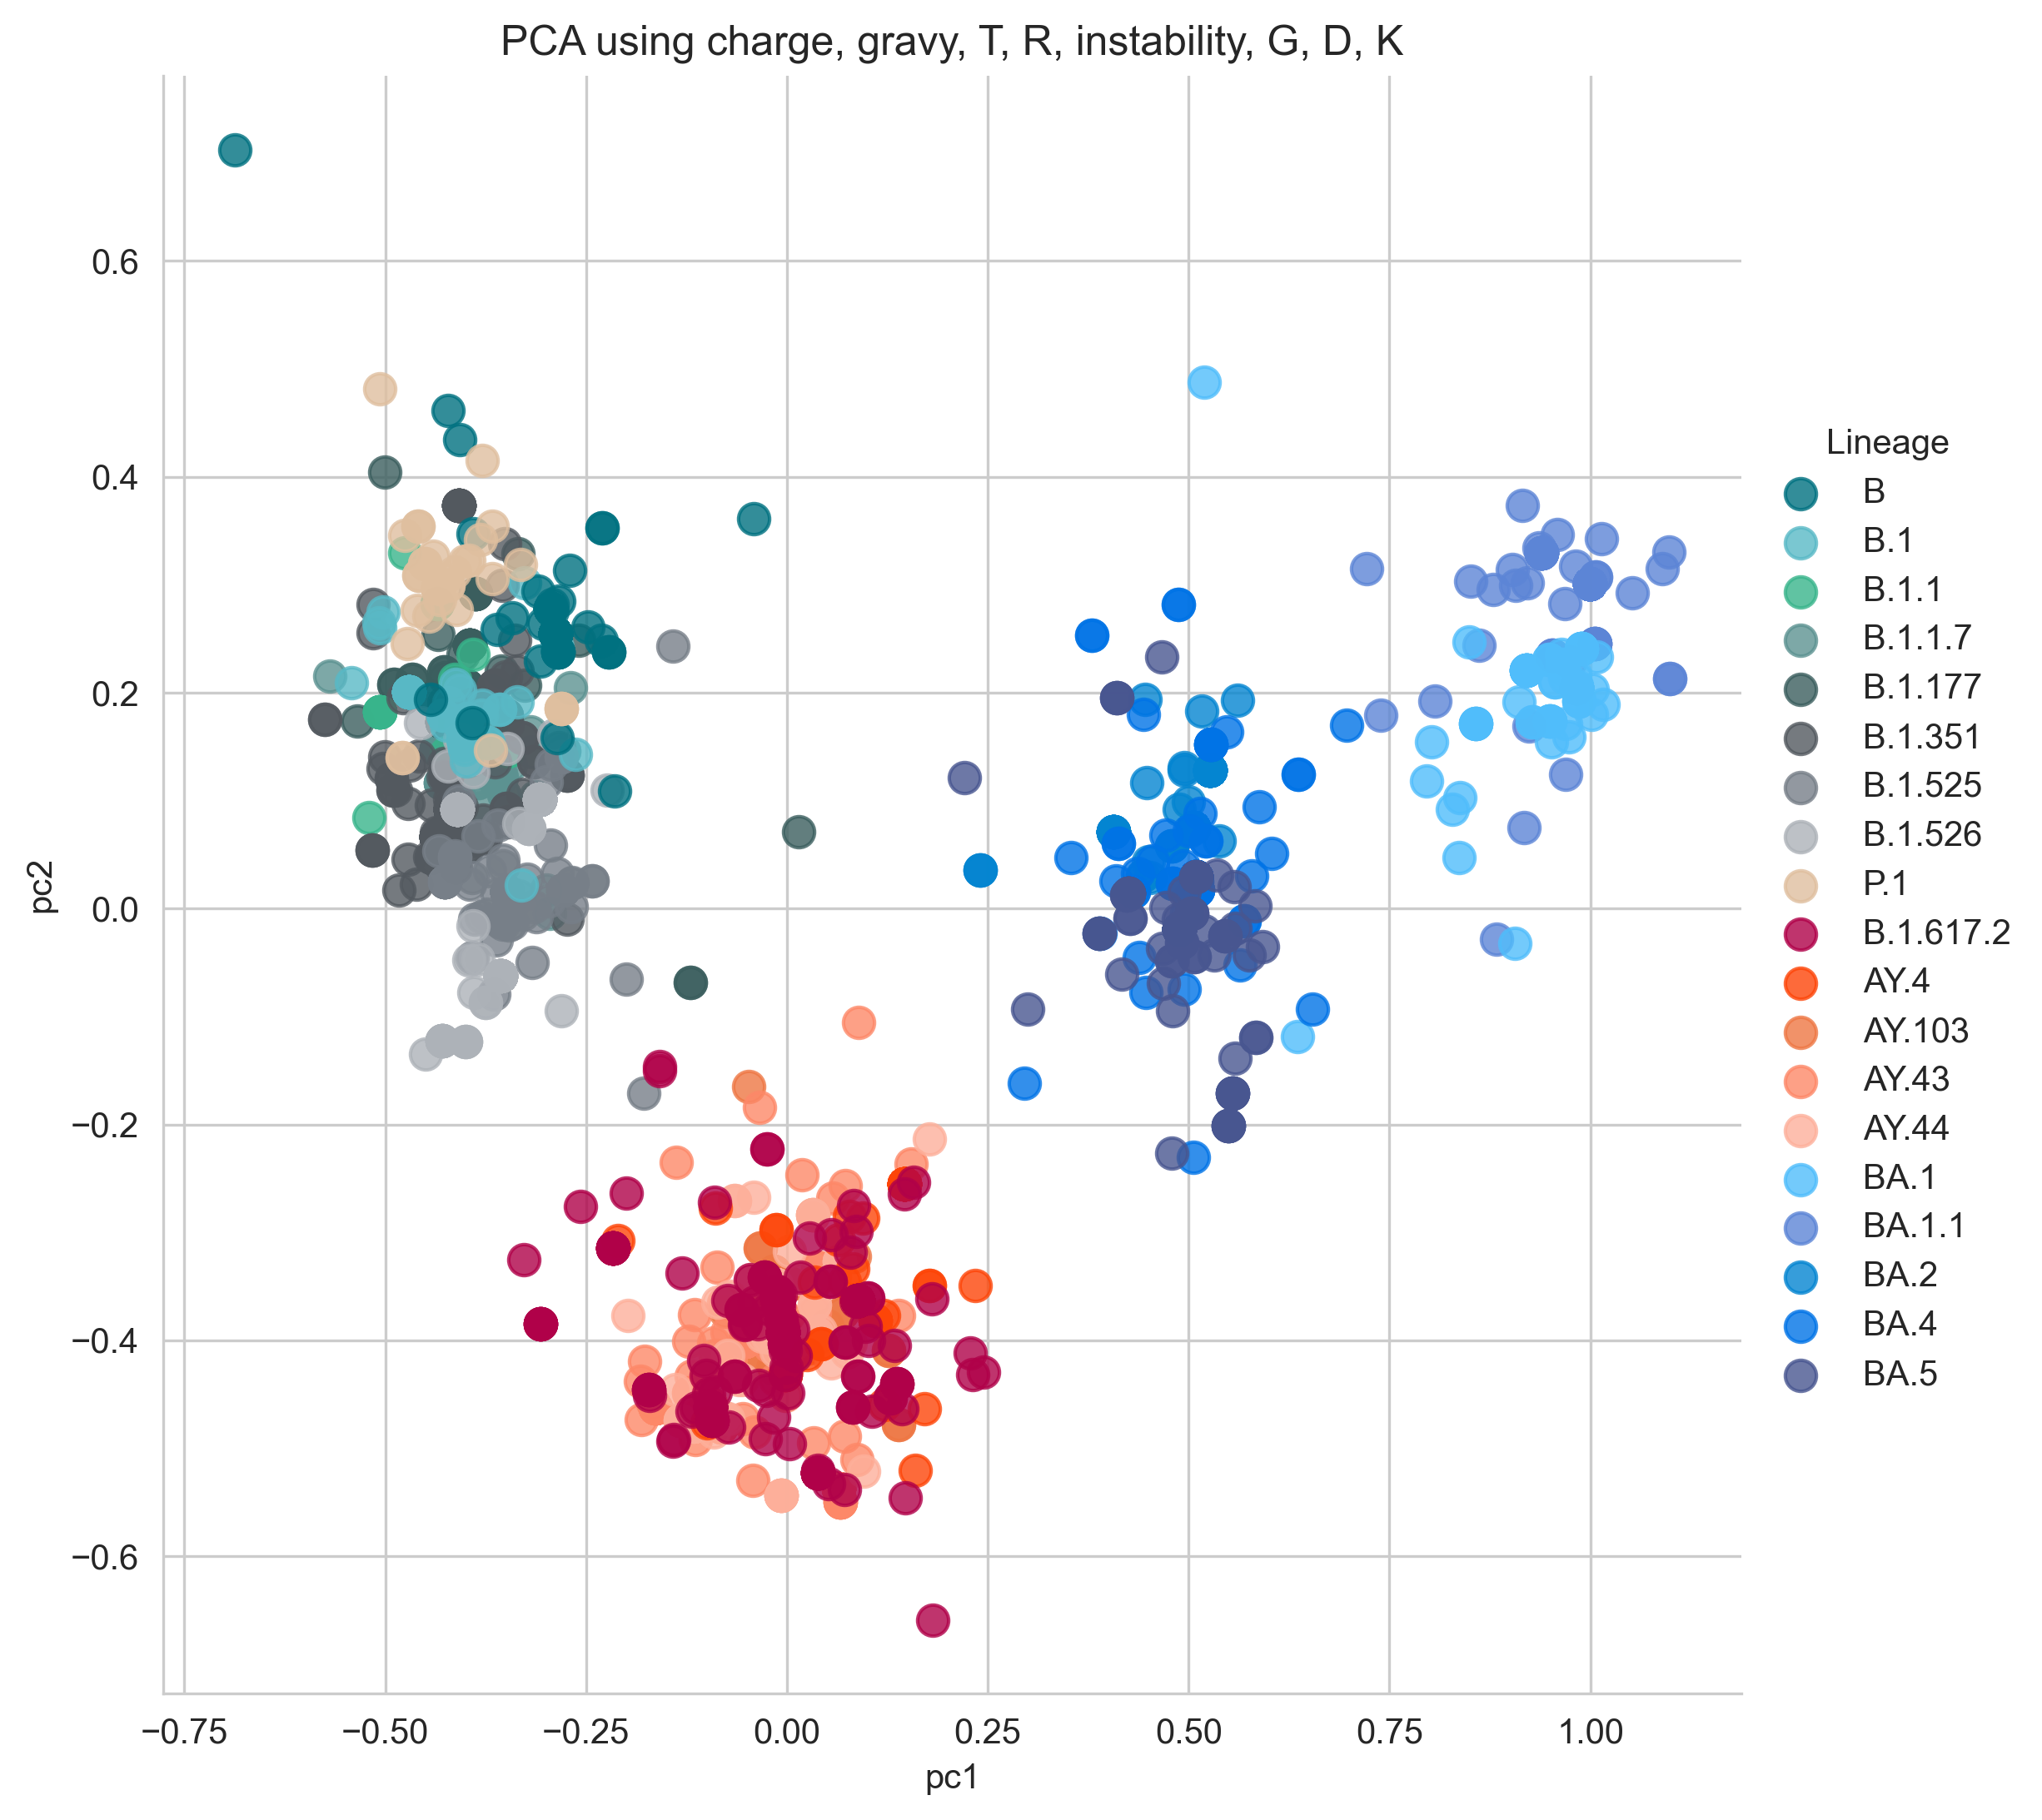

In [34]:
#BEST 8 convert dataset into PCA
pca2c = PCA(n_components=2)
pca2c.fit(dfbest8)
pca2c.transform(dfbest8)
t2c = pd.DataFrame(pca2c.transform(dfbest8))
t2c.columns = ['pc1', 'pc2']
# t2c.head()
# # Make pca t dataset index the same with the index in the original data
t2c.index = df1.index
t2c.head()
# # Return the index to the column value for highlight
t2c['Lineage'] = df1.Lineage
t2c.head()
t2c.to_csv('best7.csv', sep=',')

sns.set_style("whitegrid")

ax= sns.lmplot(data = t2c, x='pc1', y='pc2',
    size=7, 
    hue='Lineage',
    #markers=["o", "x"],
    scatter_kws={"s": 80,'alpha': 0.8},
    fit_reg=False,
#     palette=many, 
    palette =  lineage_color_dict, legend = False)
ax.add_legend(label_order = ['B','B.1','B.1.1','B.1.1.7','B.1.177','B.1.351','B.1.525','B.1.526','P.1','B.1.617.2','AY.4','AY.103','AY.43','AY.44','BA.1','BA.1.1','BA.2','BA.4','BA.5'])

# plt.tight_layout()
# plt.savefig('2D_PCA_spike_features.pdf')

plt.title('PCA using charge, gravy, T, R, instability, G, D, K')
plt.savefig(outprefix+'_2D_PCA_spike_top8.pdf',bbox_inches="tight") #bbox_inches="tight" important avoids cutoff
plt.savefig(outprefix+'_2D_PCA_spike_top8.jpg',bbox_inches="tight", dpi = 300) #bbox_inches="tight" important avoids cutoff

